In [1]:
from numpy import *
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import sympy
from sympy.physics.wigner import wigner_6j,wigner_3j,clebsch_gordan
import time

from physconsts import *
from rbconsts import *
from amophys import cc

In [2]:
#### functions 

def derivs(y0,t,O1,O2,D1,D2):
    """ Returns RHS of optical bloch eqs for current values at time t"""
    r11,r12,r13,r22,r23,r33 = y0
#     O1,2; D1,2= params # Rabi freq, detuning
    
    # time derivatives of density op elements; non-redundant eqs only
    dr11 = .5*1j*O1*(cc(r12) - r12)
    dr12 = -.5*1j*(O1*r11 + 2*D1*r12 + O2*r13 - O1*r22)
    dr13 = -.5*1j*(O2*r12 + 2*(D1 + D2)*r13 - O1*r23)
    dr22 = .5*1j*(-O1*cc(r12) + O2*cc(r23) + O1*r12 - O2*r23)
    dr23 = .5*1j*(O1*r13 - O2*r22 - 2*D2*r23 + O2*r33)
    dr33 = .5*1j*O2*(r23 - cc(r23))
    
    return array([dr11,dr12,dr13,dr22,dr23,dr33])

def runsim(func, idx=0):
    """ func is the derivs function
        idx is the index of the unraveled density matrix where 
        the population starts
    """
    dt = 0.01 # timestep for DE solver
    t_exp = 20 # experiment duration. t = 2*pi/w_rabi
    t = arange(t_exp,step=dt)

    y0 = zeros(6, complex)
    y0[0] = 1 + 0j # all population in ground state rho11

    return solve_ivp(func,[0,t_exp],y0,t_eval=linspace(0,t_exp,50))

In [4]:
#### parameters for coherent |g> <--> |r> oscillation
# w = 1 # doesn't matter here
# t2 = 1 # doesn't matter here
# t1 = t2 + 5 # doesn't matter here
# O2 = lambda t: 2*pi*1 #exp(-((t-t2)/w)**2/2) # arb units
# O1 = lambda t: 2*pi*1 #exp(-((t-t1)/w)**2/2)
# D1 = 2*pi*10 # arb units
# D2 = lambda t: -D1# + (O1(t)**2 - O2(t)**2)/4*D1

#### parameters for stirap maybe
w = 1
t2 = 5
t1 = t2 + 5
O2 = lambda t: exp(-((t-t2)/w)**2/2) # arb units
O1 = lambda t: exp(-((t-t1)/w)**2/2)
D1 = 2*pi*10 # arb units
D2 = lambda t: -D1# + (O1(t)**2 - O2(t)**2)/4*D1

C:\Users\gothr\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


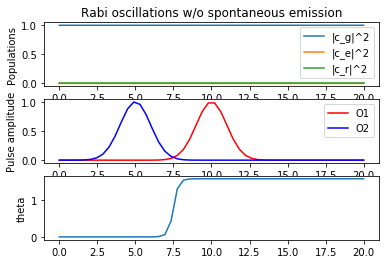

In [6]:
# func = lambda y,t: derivs(t,y,O1(t),O2(t),D1,D2(t))
func = lambda t,y: derivs(y,t,O1(t),O2(t),D1,D2(t))

soln = runsim(func)

fig, ax = plt.subplots(3,1)
unit = 1 #2*pi # divide

# populations
ax[0].set_title('Rabi oscillations w/o spontaneous emission')
ax[0].set_ylabel('Populations')
for i,l in zip([0,3,5],['|c_g|^2','|c_e|^2','|c_r|^2']):
    ax[0].plot(soln.t/unit,soln.y[i],label=l)
ax[0].legend(loc='upper right')

# rabi frequency
ax[1].set_ylabel('Pulse amplitude')
ax[1].set_xlabel('time [t/2pi]')
ax[1].plot(soln.t,O1(soln.t),c='r',label='O1')
ax[1].plot(soln.t,O2(soln.t),c='b',label='O2')
ax[1].legend(loc='upper right')

# mixing angle
ax[2].set_ylabel('theta')
ax[2].plot(soln.t, arctan(O1(soln.t)/O2(soln.t)))

plt.show()

In [7]:
list(zip([0,3,5],['|c_g|^2','|c_e|^2','|c_r|^2']))

[(0, '|c_g|^2'), (3, '|c_e|^2'), (5, '|c_r|^2')]

In [8]:
O1([1,2])

TypeError: unsupported operand type(s) for -: 'list' and 'int'